# Background

Kolya Larson (Group 1)

**Planet:** HD189733 b

**Steps:**

1. *Measure the planet's mass + uncertainty based on RV data (Cassie).*

2. Measure the planet's radius + uncertainty based on the transit data.

3. *Calculate planet's density + uncertainty after measuring its mass and radius (Cassie).*

4. **Create comparison plots for mass & radius from NEA data.**

5. *Compare with the Chen & Kipping (2016) M-R relationship.*

-----------------------------------------
Data sourced from: http://var2.astro.cz/ETD/index.php (author: JOSEP GAITAN)

Used data from https://exoplanetarchive.ipac.caltech.edu/ for the overlay plot comparing HD189733 b to other exoplanets.

_________________
Now that we have the radius & mass we're able to overlay HD 189733 b & compare it to other known exoplanets (data from NEA).

In [28]:
Mass= 375.1301                      # HD 189733 b mass we calculated (earth masses)
Radius= 13.4507                    # HD 189733 b radius we calculated (earth radii)

Import exoplanet data from NEA:

In [26]:
import pandas as pd                     # Required for reading the .csv from NEA
import astropy                          # Useful package for working with astronomy specific units and constants
from astropy import units as u                # Submodule of astropy
from astropy import constants as c            #
import numpy as np                      # Useful mathematical functions
import matplotlib.pyplot as plt         # Required for plotting data

PData = pd.read_csv("PS_2023.02.21_06.42.13.csv", skiprows=100) 
    # Skipping 100 rows in order to ensure that pandas is not confused by the commenting

#Compare the length of the dataframe to the number of planets reported by NEA (expected 5250 planets)

print("First row data:\n", PData.head(1), "\nLast row data:\n", PData.tail(1), "\nNumber of Planets:", len(PData))   # Check it worked

First row data:
     pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0  11 Com b   11 Com             1        2        1  Radial Velocity   

   disc_year     disc_facility              soltype  pl_controv_flag  \
0       2007  Xinglong Station  Published Confirmed                0   

      ...      sy_vmagerr2  sy_kmag  sy_kmagerr1  sy_kmagerr2  sy_gaiamag  \
0     ...           -0.023    2.282        0.346       -0.346     4.44038   

   sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  releasedate  
0        0.003848       -0.003848  2014-05-14     2008-01   2014-05-14  

[1 rows x 92 columns] 
Last row data:
        pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
5249  xi Aql b   xi Aql             1        1        1  Radial Velocity   

      disc_year                      disc_facility              soltype  \
5249       2007  Okayama Astrophysical Observatory  Published Confirmed   

      pl_controv_flag     ...      sy_vmagerr2

Plotting. Also overlaid planets in our own solar system.

Text(0.5, 1.0, 'Planet Radius vs Mass')

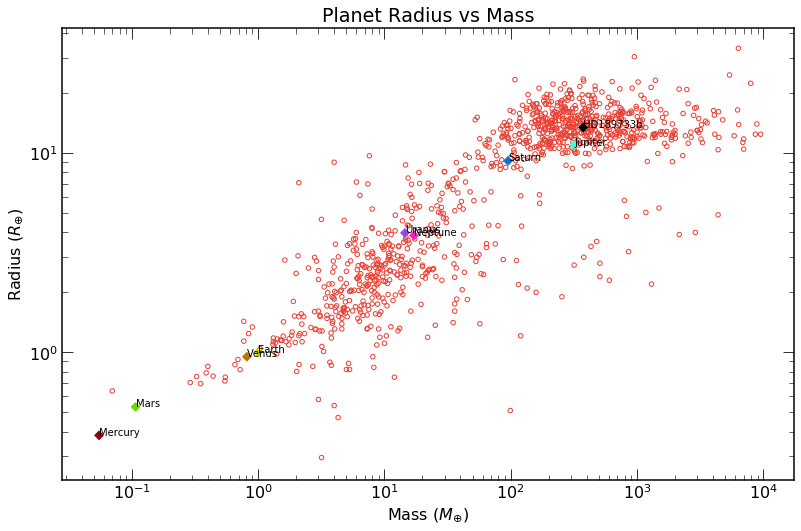

In [29]:
# Our solar system. Used Sam's code from project 1. Also added in our data.

pl_name = ["Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune",'HD189733b'] # Various information regarding our solar system planets
pl_orbper = [87.9691,224.701,365.256363004,686.980,4332.59,10759.22,30688.5,60195,0]   # put in 0 for our planet since were not looking at that.
pl_orbsmax = [0.387098,0.723332,1,1.52368055,5.2038,9.5826,19.19126,30.07,0]
pl_rade = [0.3829,0.9499,1,0.532,10.973,9.1402,3.9763962,3.8603749,Radius]
pl_bmasse = [0.055,0.815,1,0.107,317.8,95.159,14.536,17.147,Mass]
color = ['#990000','#bf7300','#c7d100','#69d900','#45ffd7','#0077d9','#9249e6','#ff1fbc',"#000000"]

SolarData = pd.DataFrame({"pl_name":pl_name, "pl_orbper":pl_orbper, "pl_orbsmax":pl_orbsmax, 
                          "pl_rade":pl_rade, "pl_bmasse":pl_bmasse, "color":color})

# Create a dictionary with updated parameters for the default matplotlib style.

style_revisions = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 16,              
 'figure.figsize' : [13.125, 8.3125], 
 'lines.linewidth' : 2.      
}

# Update the matplotlib dictionary.
plt.rcParams.update(style_revisions)


# PLOT!!!!!!

plt.scatter(x = PData.pl_bmasse, y = PData.pl_rade, s=20, facecolors='none', edgecolors='#eb4034')

plt.yscale('log')                                                          # Change y-scale to log
plt.xscale('log')                                                          # Change x-scale to log

plt.scatter(x = SolarData["pl_bmasse"], y = SolarData["pl_rade"], c = SolarData["color"], marker = 'D')
texts = [plt.annotate(SolarData.pl_name[i], (SolarData.pl_bmasse[i], SolarData.pl_rade[i]), fontsize=10) for i in range(len(SolarData.pl_orbper))]

plt.xlabel('Mass ($M_{⊕}$)')                               # Create a plot label for the x-axis
plt.ylabel('Radius ($R_{⊕}$)')                                # Create a plot label for the y-axis

plt.title('Planet Radius vs Mass')